# Introduction

In this code we will use a dataset of AirBnB for the accommodations in Boston (available at www.kaggle.com ). With this dataset we will try to answer following questions:

    1.How much is the price, depending on the location?
    2.What amenities are there and how are they distributed?
    3.Can we predict the price by using sklearn and tensorflow?


## different steps

**Part 1:** Import

**Part 2:** useful functions

**Part 3:** explore the dataset

**Part 4:** Question 1, price depending from location 

**Part 5:** Question 2, list of the amenities

**Part 6:** prepare the datset

**Part 7:** make some predictions

**Part 8:** Conclusion

## Part 1: Import

In [3]:
# to handle dataset und print the plots
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline

In [4]:
# import the preprocessing libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [5]:
# import some regressors for ML
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [81]:
# import necessary libraries from tensorflow
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.callbacks import *

## Part 2: useful functions

In [7]:
def load_data():
    '''
    INPUT:
    none
    
    OUTPUT:
    listings - a dataframe of the listings, then available
    '''
    listings=None
    
    try:
        listings=pd.read_csv(os.path.join(os.getcwd(), "listings.csv"))
    except:
        print('listings.csv is missing')
        
    return listings        

In [8]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [9]:
def r_squared(y_true, y_pred):
    '''
    INPUT:
    y_true - the real targets of the dataset
    y_pred - the predicted targets of the dataset
    
    OUTPUT:
    r2_clipped - the mean squared error of y_true and y_pred
    '''
    numerator = tf.math.reduce_sum(tf.math.square(tf.math.subtract(y_true, y_pred)))
    y_true_mean = tf.math.reduce_mean(y_true)
    denominator = tf.math.reduce_sum(tf.math.square(tf.math.subtract(y_true, y_true_mean)))
    r2 = tf.math.subtract(1.0, tf.math.divide(numerator, denominator))
    r2_clipped = tf.clip_by_value(r2, clip_value_min=0.0, clip_value_max=1.0)
    return r2_clipped

## Part 3: Explore the dataset

In [10]:
df=load_data()

In [11]:
print('Dataset has', df.shape[1], 'Columns with', df.shape[0], 'entries')

Dataset has 95 Columns with 3585 entries


In [12]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [14]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [15]:
df.groupby(['host_name']).mean()['review_scores_location'].sort_values()

host_name
Margarita    3.0
Donnie       4.0
Gong         4.0
Maxwell      6.0
Qihui        6.0
            ... 
Yisha        NaN
Zhenyang     NaN
Zulma        NaN
滢            NaN
英硕           NaN
Name: review_scores_location, Length: 1334, dtype: float64

In [16]:
df['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

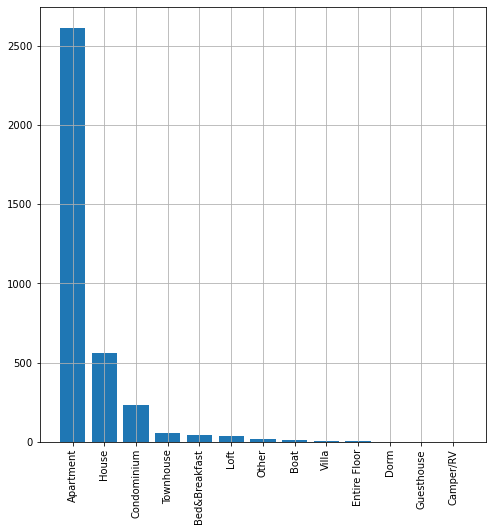

In [17]:
x=np.arange(len(df['property_type'].value_counts()))
y=df['property_type'].value_counts().to_numpy()

pp = plt.subplots(figsize=(8, 8))
pp = plt.bar(x,y)

plt.xticks(x, ('Apartment', 'House', 'Condominium', 'Townhouse', 'Bed&Breakfast', 'Loft', 'Other', 'Boat',
               'Villa', 'Entire Floor', 'Dorm', 'Guesthouse', 'Camper/RV'), rotation=90)
plt.grid(b='on') 

Which columns hasn't any nan?

In [18]:
print('Columns without nan:')
print(list(df.columns[df.isnull().mean()==0]))

Columns without nan:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'experiences_offered', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'state', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'room_type', 'accommodates', 'bed_type', 'amenities', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count']


And which columns has more then 75% nan?

In [19]:
print('Columns with more then 75% nan:')
print(list(df.columns[df.isnull().mean()>0.75]))

Columns with more then 75% nan:
['neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'has_availability', 'license', 'jurisdiction_names']


## Part 4: Question 1: price depending from location

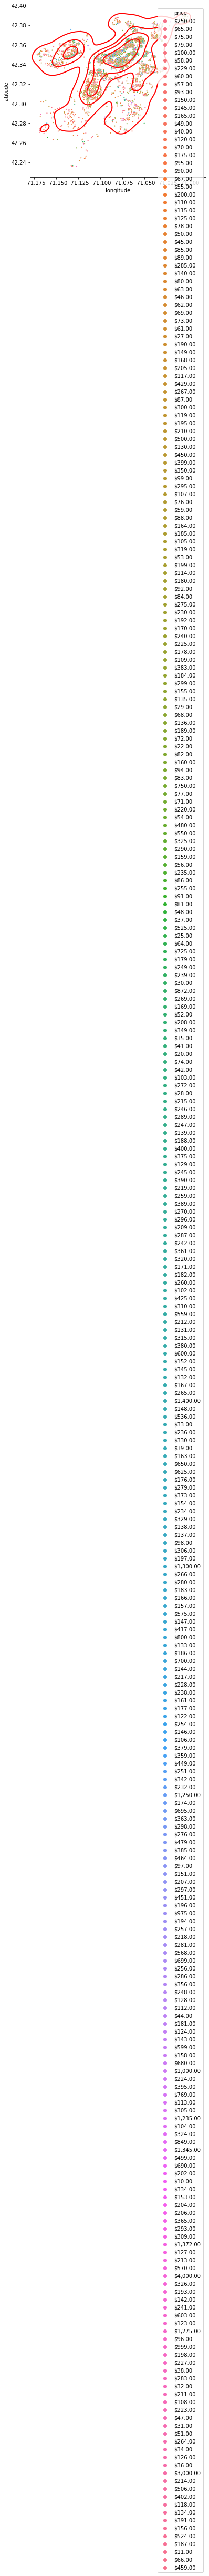

In [20]:
# Draw a combo histogram and scatterplot with density contours
pp = plt.subplots(figsize=(6, 6))
pp = sns.scatterplot(x=df['longitude'], y=df['latitude'], s=5, color=".15", hue=df['price'])
pp = sns.kdeplot(x=df['longitude'], y=df['latitude'], levels=5, color="r", linewidths=2)
pp.set_xlim(-71.18, -70.98);
pp.set_ylim(42.225, 42.4);

The plot looks good, but the legend is terrible... Let's take a look to the column 'price'!

In [21]:
df['price'].describe()

count        3585
unique        324
top       $150.00
freq          144
Name: price, dtype: object

Price is a object, better is a int. Lets change it.

In [22]:
# we remove all strings, who are not a number. After that the point is missing, so we should divide the number by 100 as well.
df['price']=df['price'].str.replace('\D+','').astype(float)/100

In [23]:
df['price'].describe()    # it's worked

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [24]:
df['price'].isnull().mean()  # we can see, in price aren't any nan

0.0

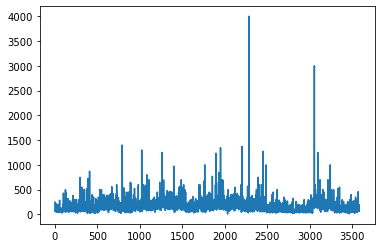

In [25]:
plt.plot(df['price']);

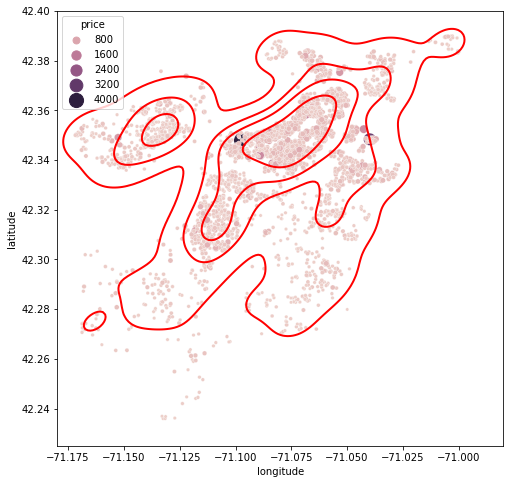

In [26]:
pp = plt.subplots(figsize=(8, 8))
pp = sns.scatterplot(x=df['longitude'], y=df['latitude'], s=1, color="1", hue=df['price'], size=df['price'],sizes=(10, 200))
pp = sns.kdeplot(x=df['longitude'], y=df['latitude'], levels=5, color="r", linewidths=2)
pp.set_xlim(-71.18, -70.98)
pp.set_ylim(42.225, 42.4);

Now looks better, lets try to plot the highest prices with other marker

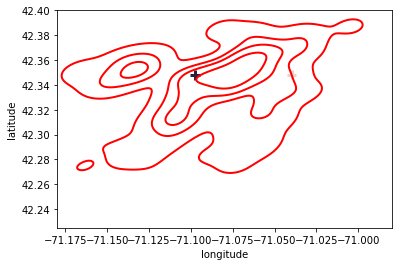

In [27]:
pp = sns.kdeplot(x=df['longitude'], y=df['latitude'], levels=5, color="r", linewidths=2)
pp = sns.scatterplot(x=df['longitude'], y=df['latitude'], s=100, hue=df['price'][df['price']>1500], size=df['price'],
                sizes=(10, 100),legend=False, marker="+", linewidth=3)
pp.set_xlim(-71.18, -70.98);
pp.set_ylim(42.225, 42.4);

and together

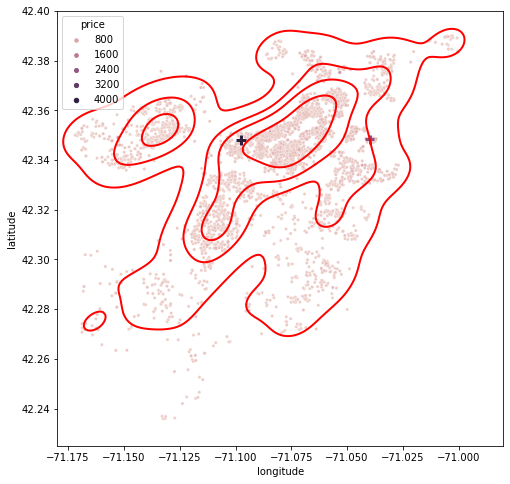

In [28]:
pp = plt.subplots(figsize=(8, 8))
pp = sns.scatterplot(x=df['longitude'], y=df['latitude'], s=1, color="1", hue=df['price'], size=df['price'],sizes=(10, 20))
pp = sns.kdeplot(x=df['longitude'], y=df['latitude'], levels=5, color="r", linewidths=2)
pp = sns.scatterplot(x=df['longitude'], y=df['latitude'], s=100, hue=df['price'][df['price']>1000], size=df['price'],
                sizes=(10, 100),legend=False, marker="+", linewidth=3)
pp.set_xlim(-71.18, -70.98);
pp.set_ylim(42.225, 42.4);

Let's take a look a little bit closer

In [29]:
tmp=df[df['price']<800]

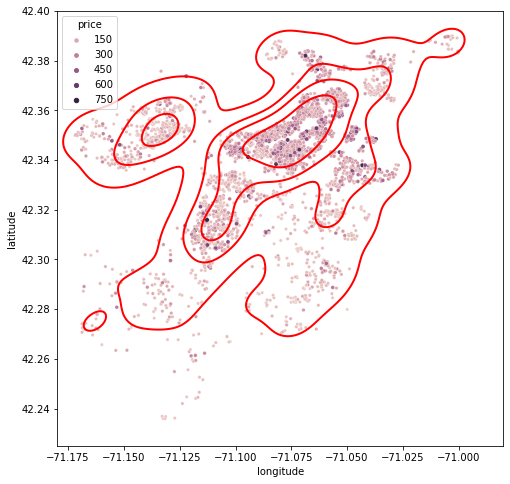

In [30]:
pp = plt.subplots(figsize=(8, 8))
pp = sns.scatterplot(x=tmp['longitude'], y=tmp['latitude'], s=1, color="1", hue=tmp['price'], size=tmp['price'], sizes=(10, 20))
pp = sns.kdeplot(x=tmp['longitude'], y=tmp['latitude'], levels=5, color="r", linewidths=2)
#pp = sns.scatterplot(x=df['longitude'], y=df['latitude'], s=100, hue=df['price'][df['price']>1000], size=df['price'],
#                sizes=(10, 100),legend=False, marker="+", linewidth=3)
pp.set_xlim(-71.18, -70.98);
pp.set_ylim(42.225, 42.4);

## Part 5: Question 2: list of the amenities

In [31]:
df.amenities.describe()

count     3585
unique    3092
top         {}
freq        32
Name: amenities, dtype: object

We have more then 3000 different entry, thats hard to plot an understand

In [32]:
# Dont try this... You really won't it
# (df.amenities.value_counts()).plot(kind="bar");
# plt.title('amenities');

A list of the different amenities

In [33]:
amenities = ["TV", "Cable TV", "Wireless Internet", "Air Conditioning", "Kitchen", "Heating","Washer","Dryer", "Internet",
             "Gym", "Elevator in Building", "Pool", "Smoke Detector", "Carbon Monoxide Detector", "Essentials", "Shampoo",
             "24-Hour Check-in", "Hangers", "Hair Dryer", "Iron", "Laptop Friendly Workspace", "Fire Extinguisher",
             "Doorman", "Family/Kid Friendly", "Free Parking on Premises", "Pets Allowed", "First Aid Kit", "Safety Card",
             "Hot Tub", "Indoor Fireplace", "Lock on Bedroom Door", "Breakfast", "Free Parking on Street"]

we make a new dataset, only with the amenities

In [34]:
tmp = df['amenities'].value_counts().reset_index()
tmp.rename(columns={'index': 'method', 'amenities': 'count'}, inplace=True)
tmp_df = total_count(tmp, 'method', 'count', amenities)
tmp_df.set_index('method', inplace=True)

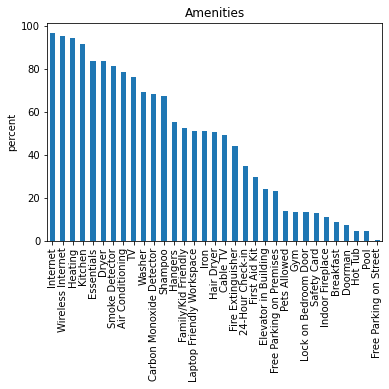

In [35]:
pp = (tmp_df/df.shape[0]*100).plot(kind='bar', legend=None);
pp.set_ylabel('percent')
pp.set_xlabel('')
plt.title('Amenities');

## Part 6: prepare the datset

First, we put new columns with the different amenities to the dataset

In [36]:
for i in range(len(amenities)):
    df[amenities[i]]=0

In [37]:
for i in range(len(df.amenities)):
    for k in range(len(amenities)):
        if amenities[k] in df['amenities'][i]:
            df[amenities[k]].at[i]=1

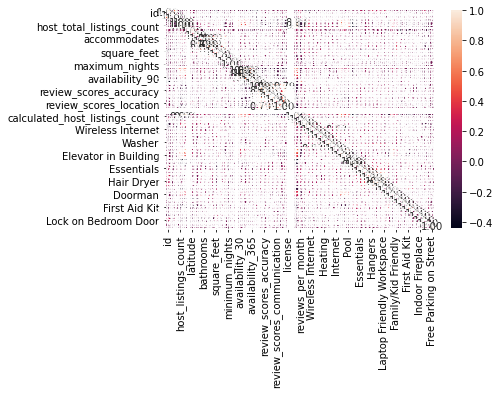

In [38]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [39]:
# the list of the columns we will be use from the origin dataset
liste = ['latitude', 'longitude','property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
         'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

In [40]:
# extend the list with the amenities
liste.extend(amenities)

In [41]:
# create new dataset
data = df.loc[:, liste]
data

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,review_scores_rating,...,Family/Kid Friendly,Free Parking on Premises,Pets Allowed,First Aid Kit,Safety Card,Hot Tub,Indoor Fireplace,Lock on Bedroom Door,Breakfast,Free Parking on Street
0,42.282619,-71.133068,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,...,1,1,0,0,0,0,0,0,0,0
1,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,94.0,...,1,0,1,0,0,0,0,1,0,0
2,42.292438,-71.135765,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,98.0,...,0,1,0,1,1,0,0,1,0,0
3,42.281106,-71.121021,House,Private room,4,1.0,1.0,2.0,Real Bed,100.0,...,0,1,0,1,1,0,1,0,1,0
4,42.284512,-71.136258,House,Private room,2,1.5,1.0,2.0,Real Bed,99.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,42.380968,-71.083795,Apartment,Private room,3,1.0,1.0,1.0,Real Bed,90.0,...,1,1,0,0,0,0,0,1,0,0
3581,42.347503,-71.118336,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,...,1,1,1,0,0,0,0,0,0,0
3582,42.371771,-71.071300,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,...,0,0,0,0,0,0,0,0,0,0
3583,42.385226,-71.080923,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,90.0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
data.groupby(['property_type']).mean()['accommodates'].sort_values()

property_type
Bed & Breakfast    2.195122
Other              2.235294
Dorm               2.500000
Townhouse          2.537037
Loft               2.871795
House              2.966192
Apartment          3.061639
Villa              3.166667
Condominium        3.186147
Entire Floor       4.000000
Guesthouse         4.000000
Boat               5.833333
Camper/RV          7.000000
Name: accommodates, dtype: float64

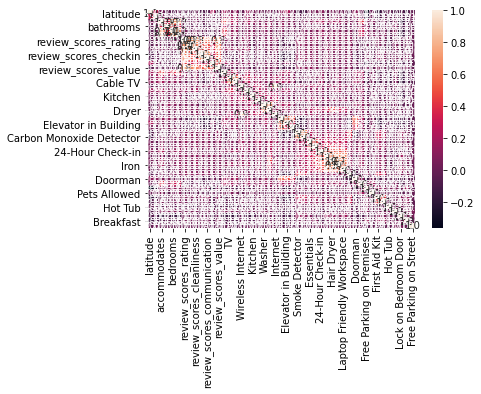

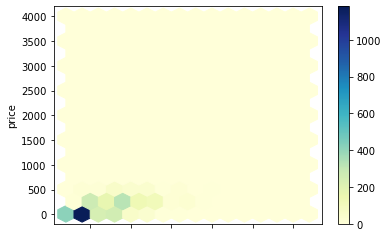

In [48]:
# Let's make some plot to understand the data
pl1 = sns.heatmap(data.corr(), annot=True, fmt=".1f");

# pl2 = plt.scatter(data.accommodates ,data.review_scores_value, marker="^")
# plt.show();

pl2 = data.plot.hexbin(x='accommodates', y='price', gridsize=15,cmap="YlGnBu")
plt.show();

In [49]:
# find the columns with nan

col_with_nan = list(data.columns[data.isnull().mean()>0])
print('Columns with nan:', col_with_nan)

Columns with nan: ['property_type', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [50]:
# percentage of nan in the column

for i in range(len(col_with_nan)):
    print(col_with_nan[i], ':', round(data[col_with_nan[i]].isnull().sum()/data.shape[0]*100,2), '%')

property_type : 0.08 %
bathrooms : 0.39 %
bedrooms : 0.28 %
beds : 0.25 %
review_scores_rating : 22.68 %
review_scores_accuracy : 22.96 %
review_scores_cleanliness : 22.82 %
review_scores_checkin : 22.87 %
review_scores_communication : 22.82 %
review_scores_location : 22.93 %
review_scores_value : 22.9 %


bedrooms, property_type, bathroom and beds are almost without nan. But in the different scores more then 20% of the values are missing! Maybe it depends on the fact that this host hasn't had a guest yet?

In [51]:
# if the host hasn't had a review yet, we fill the different review scores in the same row with zeros

no_reviews=list(df.number_of_reviews[df.number_of_reviews==0].index)

In [52]:
for i in range(len(no_reviews)):
    if np.isnan(data.review_scores_rating[no_reviews[i]]):
        data.review_scores_rating.at[no_reviews[i]]=0
    if np.isnan(data.review_scores_accuracy[no_reviews[i]]):
        data.review_scores_accuracy.at[no_reviews[i]]=0
    if np.isnan(data.review_scores_cleanliness[no_reviews[i]]):
        data.review_scores_cleanliness.at[no_reviews[i]]=0
    if np.isnan(data.review_scores_checkin[no_reviews[i]]):
        data.review_scores_checkin.at[no_reviews[i]]=0
    if np.isnan(data.review_scores_communication[no_reviews[i]]):
        data.review_scores_communication.at[no_reviews[i]]=0
    if np.isnan(data.review_scores_location[no_reviews[i]]):
        data.review_scores_location.at[no_reviews[i]]=0
    if np.isnan(data.review_scores_value[no_reviews[i]]):
        data.review_scores_value.at[no_reviews[i]]=0

In [53]:
# new percentage of nan in the column
for i in range(len(col_with_nan)):
    print(col_with_nan[i], ':', round(data[col_with_nan[i]].isnull().sum()/data.shape[0]*100,2), '%')

property_type : 0.08 %
bathrooms : 0.39 %
bedrooms : 0.28 %
beds : 0.25 %
review_scores_rating : 1.59 %
review_scores_accuracy : 1.87 %
review_scores_cleanliness : 1.73 %
review_scores_checkin : 1.79 %
review_scores_communication : 1.73 %
review_scores_location : 1.84 %
review_scores_value : 1.81 %


Now, we have two options. First, we fill the nan with the mean of the column or, second, we drop the rows with nan. If we do that, in the worst case, we will lost up to 14% of the dataset.

But, the the mean value, we can go to distort the dataset, a "bad" host can get a good mean score. Thats why we now deleting the last rows with nan.

In [54]:
data.dropna(inplace=True)

In [55]:
print('count the nan:', data.isnull().sum().sum()) # it's works

count the nan: 0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3483 entries, 0 to 3584
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   latitude                     3483 non-null   float64
 1   longitude                    3483 non-null   float64
 2   property_type                3483 non-null   object 
 3   room_type                    3483 non-null   object 
 4   accommodates                 3483 non-null   int64  
 5   bathrooms                    3483 non-null   float64
 6   bedrooms                     3483 non-null   float64
 7   beds                         3483 non-null   float64
 8   bed_type                     3483 non-null   object 
 9   review_scores_rating         3483 non-null   float64
 10  review_scores_accuracy       3483 non-null   float64
 11  review_scores_cleanliness    3483 non-null   float64
 12  review_scores_checkin        3483 non-null   float64
 13  review_scores_comm

Three Columns are objects, in this case they are categorical data. We use the One-Hot-Encoding to change them to ints

In [59]:
data = pd.concat([data,pd.get_dummies(data['room_type'], prefix='room',dummy_na=True)],axis=1).drop(['room_type'],axis=1)
data = pd.concat([data,pd.get_dummies(data['property_type'], prefix='prop',dummy_na=True)],axis=1).drop(['property_type'],axis=1)
data = pd.concat([data,pd.get_dummies(data['bed_type'], prefix='bed',dummy_na=True)],axis=1).drop(['bed_type'],axis=1)
data

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,prop_Other,prop_Townhouse,prop_Villa,prop_nan,bed_Airbed,bed_Couch,bed_Futon,bed_Pull-out Sofa,bed_Real Bed,bed_nan
0,42.282619,-71.133068,4,1.5,2.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,42.286241,-71.134374,2,1.0,1.0,1.0,94.0,10.0,9.0,10.0,...,0,0,0,0,0,0,0,0,1,0
2,42.292438,-71.135765,2,1.0,1.0,1.0,98.0,10.0,9.0,10.0,...,0,0,0,0,0,0,0,0,1,0
3,42.281106,-71.121021,4,1.0,1.0,2.0,100.0,10.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0
4,42.284512,-71.136258,2,1.5,1.0,2.0,99.0,10.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,42.380968,-71.083795,3,1.0,1.0,1.0,90.0,10.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0
3581,42.347503,-71.118336,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3582,42.371771,-71.071300,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3583,42.385226,-71.080923,2,1.0,1.0,1.0,90.0,9.0,8.0,9.0,...,0,0,0,0,0,0,0,0,1,0


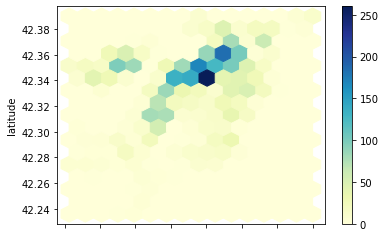

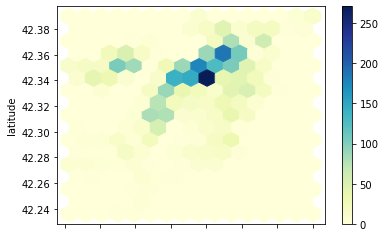

In [66]:
# a short visuell test between origin data and prepared data
data.plot.hexbin(x='longitude', y='latitude', gridsize=15,cmap="YlGnBu")
plt.show();

df.plot.hexbin(x='longitude', y='latitude', gridsize=15,cmap="YlGnBu")
plt.show;

In [67]:
# define the targed
y = data['price'].to_numpy()
y

array([250.,  65.,  65., ..., 198.,  65.,  65.])

In [68]:
# define the features
columns=list(data.columns)
feature_list = columns
feature_list.remove('price')
X = data[feature_list].to_numpy()

In [70]:
# split the data in a training and test set
[X_train, X_test, y_train, y_test]=train_test_split(X, y, test_size=0.3, random_state=5)
print('size of X_train:', X_train.shape[0])
print('size of y_train:', y_train.shape[0])
print('size of X_test:', X_test.shape[0])
print('size of y_test:', y_test.shape[0])

size of X_train: 2438
size of y_train: 2438
size of X_test: 1045
size of y_test: 1045


## Part 7: make some predictions

In [71]:
# prepare the regressors, each can also be individually tuned
LinReg = LinearRegression()
KNeigh = KNeighborsRegressor()
DecTre = DecisionTreeRegressor()
RanFor = RandomForestRegressor()
GraBoo = GradientBoostingRegressor()
XGBoos = XGBRegressor()

In [72]:
# make the predictions
LinReg.fit(X_train, y_train);
KNeigh.fit(X_train, y_train);
DecTre.fit(X_train, y_train);
RanFor.fit(X_train, y_train);
GraBoo.fit(X_train, y_train);
XGBoos.fit(X_train, y_train);

print('LinReg: ', LinReg.score(X_test,y_test))
print('KNeigh: ', KNeigh.score(X_test,y_test))
print('DecTre: ', DecTre.score(X_test,y_test))
print('RanFor: ', RanFor.score(X_test,y_test))
print('GraBoo: ', GraBoo.score(X_test,y_test))
print('XGBoos: ', XGBoos.score(X_test,y_test))

score=[]
score.append(LinReg.score(X_test,y_test))
score.append(KNeigh.score(X_test,y_test))
score.append(DecTre.score(X_test,y_test))
score.append(RanFor.score(X_test,y_test))
score.append(GraBoo.score(X_test,y_test))
score.append(XGBoos.score(X_test,y_test))

LinReg:  0.4021731952980351
KNeigh:  0.40045073637810014
DecTre:  -0.5171675493031593
RanFor:  0.41020024517839626
GraBoo:  0.4461350906990189
XGBoos:  0.4052484026420151


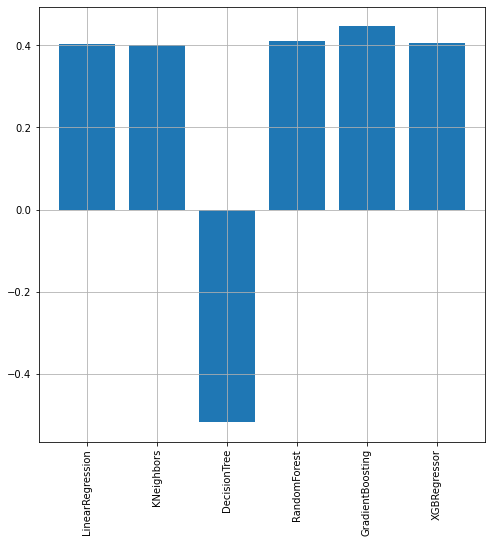

In [73]:
x=np.arange(len(score))
y=score

pp = plt.subplots(figsize=(8, 8))
pp = plt.bar(x,y)

plt.xticks(x, ('LinearRegression', 'KNeighbors', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'XGBRegressor'),
           rotation=90)
plt.grid(b='on') 

#### the score is really bad, what happens if we remove the outliers?

In [74]:
indexNames = data[ df['price'] > 800 ].index;
print(indexNames)
data.drop(indexNames , inplace=True)

X = data[feature_list].to_numpy()
y = data['price'].to_numpy()

Int64Index([ 408,  793, 1022, 1262, 1399, 1764, 1896, 1932, 1950, 2204, 2285,
            2448, 2485, 3055, 3096, 3242],
           dtype='int64')


E:\Anaconda\envs\KNN\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [75]:
[X_train, X_test, y_train, y_test]=train_test_split(X, y, test_size=0.3, random_state=5)
print('size of X_train:', X_train.shape[0])
print('size of y_train:', y_train.shape[0])
print('size of X_test:', X_test.shape[0])
print('size of y_test:', y_test.shape[0])

size of X_train: 2426
size of y_train: 2426
size of X_test: 1041
size of y_test: 1041


In [76]:
LinReg.fit(X_train, y_train);
KNeigh.fit(X_train, y_train);
DecTre.fit(X_train, y_train);
RanFor.fit(X_train, y_train);
GraBoo.fit(X_train, y_train);
XGBoos.fit(X_train, y_train);

print('LinReg: ', LinReg.score(X_test,y_test))
print('KNeigh: ', KNeigh.score(X_test,y_test))
print('DecTre: ', DecTre.score(X_test,y_test))
print('RanFor: ', RanFor.score(X_test,y_test))
print('GraBoo: ', GraBoo.score(X_test,y_test))
print('XGBoos: ', XGBoos.score(X_test,y_test))

score=[]
score.append(LinReg.score(X_test,y_test))
score.append(KNeigh.score(X_test,y_test))
score.append(DecTre.score(X_test,y_test))
score.append(RanFor.score(X_test,y_test))
score.append(GraBoo.score(X_test,y_test))
score.append(XGBoos.score(X_test,y_test))

LinReg:  0.5528456655867038
KNeigh:  0.4670832291510876
DecTre:  0.17697234538322282
RanFor:  0.608866284878925
GraBoo:  0.6162486130815614
XGBoos:  0.5671868921722982


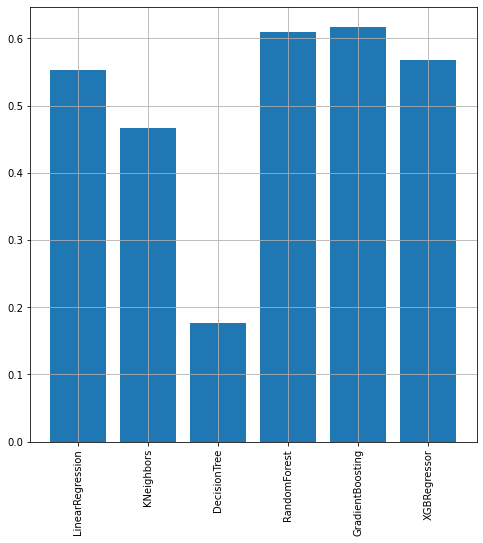

In [77]:
x=np.arange(len(score))
y=score

pp = plt.subplots(figsize=(8, 8))
pp = plt.bar(x,y)

plt.xticks(x, ('LinearRegression', 'KNeighbors', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'XGBRegressor'),
           rotation=90)
plt.grid(b='on') 

after removing the outliers, the score of the most regressors will rise

#### Last but not least, we will using Tensorflow

In [79]:
# additionaly, now we use a scaler to transform each point to a value between 0 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
# Model params
lr = 0.0001                 # learning rate
optimizer = Adam(lr=lr)     # which optimizer
epochs = 400                # how many epochs we will train

# training will stopped if the val_loss doesn't get better for 15 epochs
es_callback = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

batch_size = 256 

# Define the DNN
model = Sequential()
model.add(Dense(units=32, input_shape=(X_train.shape[1], )))
model.add(Activation("relu"))
model.add(Dense(units=256))
model.add(Activation("relu"))
model.add(Dense(units=256))
model.add(Activation("relu"))
model.add(Dense(units=1))
model.summary()



model.compile(loss='mse', optimizer=optimizer, metrics=[r_squared])
model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=batch_size, callbacks=[es_callback],
          validation_data=[X_test, y_test])
score_tf = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                2272      
_________________________________________________________________
activation_12 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               8448      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

2426/2426 [==============================] - 0s 22us/sample - loss: 6659.2760 - r_squared: 0.4478 - val_loss: 5684.9796 - val_r_squared: 0.5056
Epoch 44/400
2426/2426 [==============================] - 0s 23us/sample - loss: 6582.1173 - r_squared: 0.4610 - val_loss: 5641.2409 - val_r_squared: 0.5109
Epoch 45/400
2426/2426 [==============================] - 0s 23us/sample - loss: 6511.0878 - r_squared: 0.4730 - val_loss: 5607.0544 - val_r_squared: 0.5146
Epoch 46/400
2426/2426 [==============================] - 0s 23us/sample - loss: 6448.8584 - r_squared: 0.4749 - val_loss: 5576.7767 - val_r_squared: 0.5181
Epoch 47/400
2426/2426 [==============================] - 0s 23us/sample - loss: 6387.4459 - r_squared: 0.4849 - val_loss: 5553.2276 - val_r_squared: 0.5206
Epoch 48/400
2426/2426 [==============================] - 0s 23us/sample - loss: 6336.5279 - r_squared: 0.4768 - val_loss: 5527.2159 - val_r_squared: 0.5235
Epoch 49/400
2426/2426 [==============================] - 0s 22us/sampl

2426/2426 [==============================] - 0s 21us/sample - loss: 5312.5316 - r_squared: 0.5586 - val_loss: 5058.3142 - val_r_squared: 0.5632
Epoch 96/400
2426/2426 [==============================] - 0s 21us/sample - loss: 5302.0367 - r_squared: 0.5701 - val_loss: 5058.8240 - val_r_squared: 0.5631
Epoch 97/400
2426/2426 [==============================] - 0s 22us/sample - loss: 5291.5612 - r_squared: 0.5526 - val_loss: 5045.5285 - val_r_squared: 0.5640
Epoch 98/400
2426/2426 [==============================] - 0s 22us/sample - loss: 5281.9032 - r_squared: 0.5685 - val_loss: 5031.1263 - val_r_squared: 0.5650
Epoch 99/400
2426/2426 [==============================] - 0s 22us/sample - loss: 5271.5306 - r_squared: 0.5691 - val_loss: 5028.9232 - val_r_squared: 0.5650
Epoch 100/400
2426/2426 [==============================] - 0s 21us/sample - loss: 5262.3174 - r_squared: 0.5851 - val_loss: 5029.2700 - val_r_squared: 0.5652
Epoch 101/400
2426/2426 [==============================] - 0s 21us/sam

Epoch 147/400
2426/2426 [==============================] - 0s 22us/sample - loss: 4936.8864 - r_squared: 0.5932 - val_loss: 4947.8988 - val_r_squared: 0.5710
Epoch 148/400
2426/2426 [==============================] - 0s 21us/sample - loss: 4933.0481 - r_squared: 0.5971 - val_loss: 4942.9666 - val_r_squared: 0.5712
Epoch 149/400
2426/2426 [==============================] - 0s 22us/sample - loss: 4929.3612 - r_squared: 0.6049 - val_loss: 4929.1338 - val_r_squared: 0.5722
Epoch 150/400
2426/2426 [==============================] - 0s 21us/sample - loss: 4921.7799 - r_squared: 0.5982 - val_loss: 4931.5385 - val_r_squared: 0.5720
Epoch 151/400
2426/2426 [==============================] - 0s 21us/sample - loss: 4916.3141 - r_squared: 0.6106 - val_loss: 4937.1526 - val_r_squared: 0.5716
Epoch 152/400
2426/2426 [==============================] - 0s 21us/sample - loss: 4912.2257 - r_squared: 0.6006 - val_loss: 4939.4124 - val_r_squared: 0.5714
Epoch 153/400
2426/2426 [===========================

Epoch 199/400
2426/2426 [==============================] - 0s 21us/sample - loss: 4718.2513 - r_squared: 0.6204 - val_loss: 4888.7799 - val_r_squared: 0.5732
Epoch 200/400
2426/2426 [==============================] - 0s 22us/sample - loss: 4716.5124 - r_squared: 0.6186 - val_loss: 4895.8892 - val_r_squared: 0.5729
Epoch 201/400
2426/2426 [==============================] - 0s 21us/sample - loss: 4712.5945 - r_squared: 0.6117 - val_loss: 4895.2174 - val_r_squared: 0.5725
Epoch 202/400
2426/2426 [==============================] - 0s 21us/sample - loss: 4710.9456 - r_squared: 0.6174 - val_loss: 4886.0666 - val_r_squared: 0.5733
Epoch 203/400
2426/2426 [==============================] - 0s 21us/sample - loss: 4706.6642 - r_squared: 0.6202 - val_loss: 4898.0115 - val_r_squared: 0.5723
Epoch 204/400
2426/2426 [==============================] - 0s 21us/sample - loss: 4701.6990 - r_squared: 0.6135 - val_loss: 4905.7100 - val_r_squared: 0.5716
Epoch 205/400
2426/2426 [===========================

In [89]:
print('Score', score_tf[1].round(4))

Score 0.5141


## Part 8: Conclusion

In [91]:
# how is the predicted price and the deviation
y_pred = np.ravel(model.predict(X_test))
dev_price = abs((y_test-y_pred))

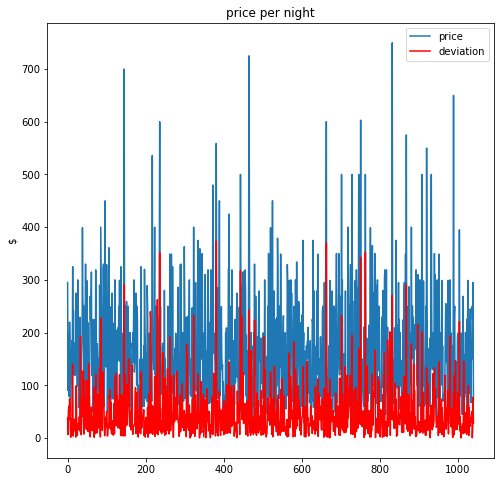

In [92]:
pp = plt.subplots(figsize=(8, 8))
pp = plt.plot(y_test, label='price')
pp = plt.plot(dev_price,c='r',label='deviation')
pp = plt.ylabel('$')
pp = plt.legend()

plt.title('price per night');

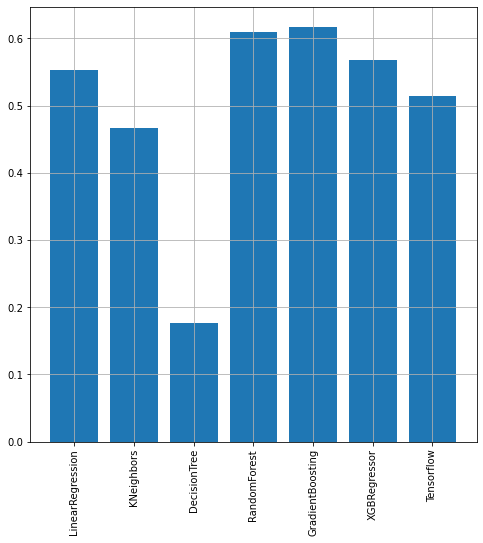

In [93]:
score.append(score_tf[1])
x=np.arange(len(score))
y=score

pp = plt.subplots(figsize=(8, 8))
pp = plt.bar(x,y)

plt.xticks(x, ('LinearRegression', 'KNeighbors', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'XGBRegressor',
               'Tensorflow'),
           rotation=90)
plt.grid(b='on') 

For a good prediction of the price, the used dataset aren’t good enough. It’s seem to give more dependecies which are not examined in this case (for example the reviews) or which are not exist in the dataset (Condition of the apartment, furniture and so on).
For a better prediction score, we have to use more data and a sentiment analysis of the reviews seems to be useful too.